In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()


In [3]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
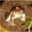

In [4]:
x_train[0]

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
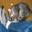

In [7]:
x_test[0]

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.flatten()
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
#ANN

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 363s 231ms/step - loss: 1.8970 - accuracy: 0.3267
Epoch 2/5
1563/1563 [==============================] - 359s 230ms/step - loss: 1.6661 - accuracy: 0.4022
Epoch 3/5
1563/1563 [==============================] - 373s 239ms/step - loss: 1.5802 - accuracy: 0.4362
Epoch 4/5
1563/1563 [==============================] - 364s 233ms/step - loss: 1.5231 - accuracy: 0.4544
Epoch 5/5
1563/1563 [==============================] - 361s 231ms/step - loss: 1.4899 - accuracy: 0.4683


In [20]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.5597 - accuracy: 0.4465


[1.559694766998291, 0.4465000033378601]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5143 - accuracy: 0.4540
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1568 - accuracy: 0.5937
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0115 - accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9274 - accuracy: 0.6779
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8617 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8123 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7751 - accuracy: 0.7336
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7287 - accuracy: 0.7486
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6994 - accuracy: 0.7597
Epoch 10/10
1563/1563 [==============================] - 67s 43m